# **INTELIGENCIA DEL NEGOCIO / Business Intelligence**
## **ASSIGNMENT A2 - CONVOLUTIONAL NEURAL NETWORKS**

**INSTRUCCIONES / RECOMENDACIONES**

- Se recomienda leer con detalle la descripción de cada una de las celdas.
- Las celdas que ya tienen código, se deberán ejecutar directamente.
- Las celdas que están vacías, se completarán con la implementación requerida en el notebook.
- No se incluirán más celdas de las establecidas en el presente notebook, por lo que la solución al mismo deberá implementarse exclusivamente en las celdas vacías.
- Scikit-Learn es un paquete muy útil para las operaciones de preprocesamiento de los datos, como estandarización, normalización, codificación, etc.
- Recuerda poner nombre a todas las layers de Keras, facilitará mucho las cosas a la hora de depurar errores.
- Si ves que un apartado es complejo, intenta escribir y ejecutarlo de forma simplificada (por ejemplo, con menos layers o con menos features) y después vaya amplíandolo.
- La entrega se realizará vía Moodle. Será necesario subir la solución a este notebook con el nombre: **NOMBRE_GRUPO.ipynb**

- **Fecha de Publicación: 19/02/2024**
- **Fecha de Entrega: 25/02/2024**
- **Test: 26/02/2024**


# Carga de librerías


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization



print("TF VERSION: ", tf.__version__)

TF VERSION:  2.15.0


# Carga dataset

Se utilizará un dataset de imágenes sobre señales de tráfico, para la construcción de un clasificador multiclase.

El dataset está contenido en el fichero: **traffic-sign.zip**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path Google Drive de Victor
!unzip -q /content/drive/MyDrive/Colab Notebooks/Deep_Learning/Proyecto2/traffic-sign.zip

# Path Google Drive de Jesus
!unzip -q /content/drive/MyDrive/data/traffic-sign.zip


unzip:  cannot find or open /content/drive/MyDrive/Colab, /content/drive/MyDrive/Colab.zip or /content/drive/MyDrive/Colab.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/data/traffic-sign.zip, /content/drive/MyDrive/data/traffic-sign.zip.zip or /content/drive/MyDrive/data/traffic-sign.zip.ZIP.


# Preparación de datasets

Divida el dataset original de señales de tráfico en train, validation y test.

In [ ]:
# Define global variables
img_size = 32
batch_size = 64

data_dir_jesus = '/content/traffic-sign'
data_dir_victor = '/content/drive/MyDrive/Colab Notebooks/Deep_Learning/Proyecto2/traffic-sign'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_victor,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_victor,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 26780 files belonging to 20 classes.
Using 21424 files for training.
Found 26780 files belonging to 20 classes.
Using 5356 files for validation.


# Visualizar los datos

Mostrar una muestra representativa de las imágenes contenidas dentro del dataset de entrenamiento.

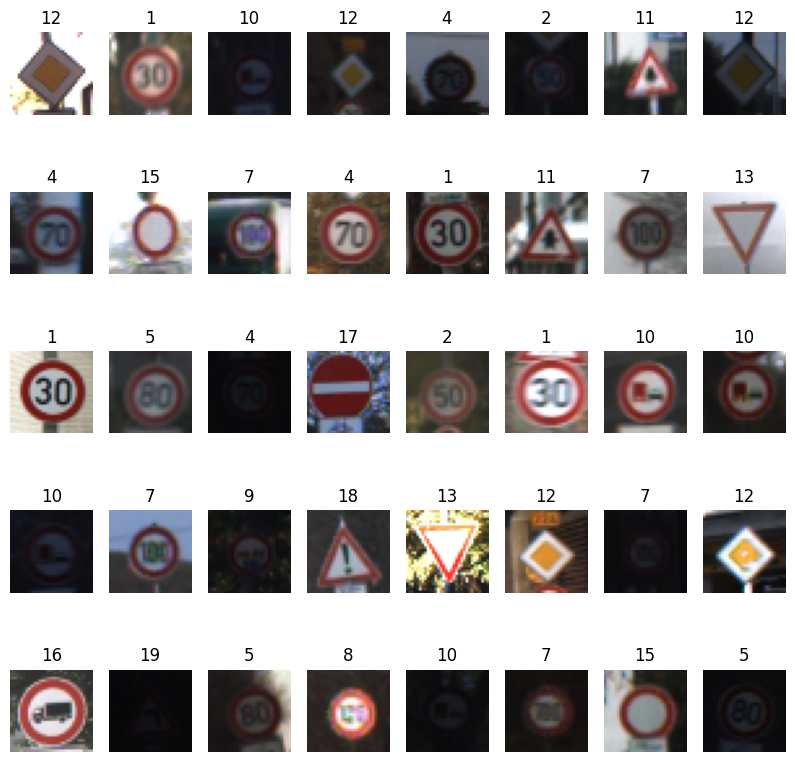

In [ ]:
# Plot some images and classes
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(40):
    ax = plt.subplot(5, 8, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



# Activar la cache para la carga de imágenes durante el entrenamiento y la verificación de rendimiento

In [ ]:
# Plot size
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


# Save images in cache memory
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

(64, 32, 32, 3)
(64,)


# Modelo Deep Learning basado en CNN

Construya un modelo CNN para la clasificación de las señales de tráfico a partir del dataset.

Utilice algunas de las técnicas de regularización para evitar el overfitting del modelo siempre que sea necesario.

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential([

  # In the first layer we aplly normalization to our data
  tf.keras.layers.Rescaling(1./255),

  # Here we apply convolutional layers and maxpooling three times in a row
  #  This will reduce the dimensionality of the tensors the model is dealing with
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  # As a final step we use a flatten layer and we apply two dense layers
  # with an ouput dimension equal to the number of classes we are trying to predict
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

## Compilación del modelo
Compile el modelo con Adam como función de optimización. Elija la función de pérdida acorde con el objetivo del modelo CNN

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
  )

model.build(input_shape=(64, img_size, img_size, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (64, 32, 32, 3)           0         
                                                                 
 conv2d (Conv2D)             (64, 30, 30, 32)          896       
                                                                 
 max_pooling2d (MaxPooling2  (64, 15, 15, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (64, 13, 13, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (64, 6, 6, 32)            0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (64, 4, 4, 32)            9

## Entrenamiento

Seleccionar el tamaño del batch y el número de epochs necesarios.

In [ ]:
epochs = 5

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs= epochs
)


Epoch 1/5
 55/335 [===>..........................] - ETA: 30:29 - loss: 2.8043 - accuracy: 0.1216

## Mostrar los resultados del entrenamiento
El método fit devuelve un objeto de tipo history con las métricas obtenidas durante el entrenamiento. Analice el resultado de ejecutar 'history.history' y dibuje las métricas en las distintas épocas.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Precisión y validación
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g-*', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

# pérdida de entrenamienot y la validación
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'g-*', label='Validation Loss')
plt.title(' Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## Evaluación

Utilice el dataset de test para verificar el rendimiento del modelo creado.

In [ ]:
# Evaluar el modelo en el dataset de test
test_loss, test_accuracy = model.evaluate(val_ds)

print(f"Pérdida del conjunto de test: {test_loss}")
print(f"Precisión del conjunto de test: {test_accuracy}")

# Modelo CNN aplicando Transfer Learning

En base al mismo dataset de señales de tráfico, construir un segundo modelo CNN empleando técnicas de Transfer Learning, con el objetivo de mejorar su rendimiento.

Se deberá utilizar como modelo base, cualquiera de los modelos existentes en el TF Hub (https://www.kaggle.com/models)

Nota: evaluar las dimensiones del modelo base, ya que si es demasiado grande, podría llegar a existir un problema de falta de recursos dentro de Colab.


In [ ]:
efficientnet = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b7-feature-vector/versions/1",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Although the model works better with (600x600) it is flexible
# Our images are not big enough to fit that size so we will leave our previous size
efficientnet.build([batch_size, img_size, img_size, 3])  # Batch input shape.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    efficientnet,
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(20, activation='softmax')
])


## Compilación del modelo

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.build(input_shape=(batch_size, img_size, img_size, 3))
model.summary()

## Entrenamiento

In [ ]:
epochs = 5
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)


## Mostrar los resultados del entrenamiento

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.linspace(1,5,5)

# Graficar la precisión del entrenamiento y la validación
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b-o', label='Training Accuracy')
plt.plot(x, val_acc, 'g-*', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

# Graficar la pérdida del entrenamiento y la validación
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b-o', label='Training Loss')
plt.plot(x, val_loss, 'g-*', label='Validation Loss')
plt.title(' Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## Evaluación

In [ ]:
test_loss, test_accuracy = model.evaluate(val_ds)

print(f"Pérdida del conjunto de test: {test_loss}")
print(f"Precisión del conjunto de test: {test_accuracy}")

# Conclusiones del estudio

Detallar las principales conclusiones extraidas sobre la construcción del modelo CNN, la aplicación de las técnicas de transfer learning, y la comparativa entre ambos.


Con este ejercicio podemos ver que una CNN simple como la que hemos definido en el primer apartado puede explicar los datos con mucha precisión. En este caso con más del 96% de precisión. Además, nuestro modelo es capaz de converger y llegar a esta precisión en tan solo 5 epochs.

Sin embargo, el modelo de transfer learning se queda muy atrás en términos de precisión y probablemente necesite muchos más epochs para adapatarse a este dataset específico. Habría que estudiar con mayor profundidad las capas del modelo y con qué datos ha sido entrenado para poder adaptarlo mejor a los modelos.Aunque, cabe decir, que el Transer Learning no parece una estrategia muy eficiente cuando se puede crear un moodelo sencillo y de rápido entrenamiento que se adapte al problema en cuestión.



